In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [4]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

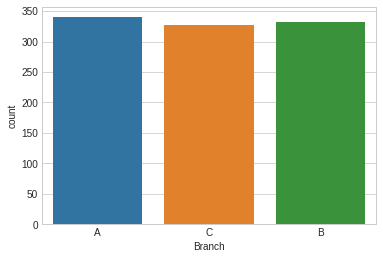

In [76]:
sns.countplot(x=df['Branch'])

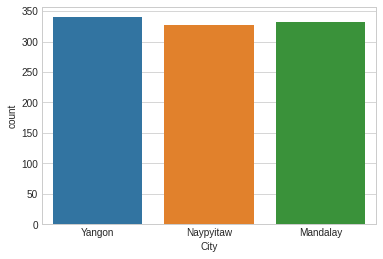

In [77]:
sns.countplot(x=df['City'])

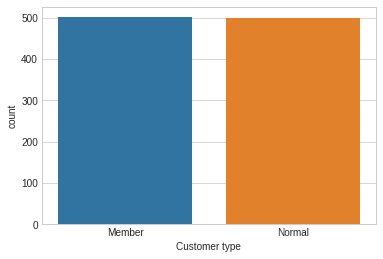

In [78]:
sns.countplot(x=df['Customer type'])

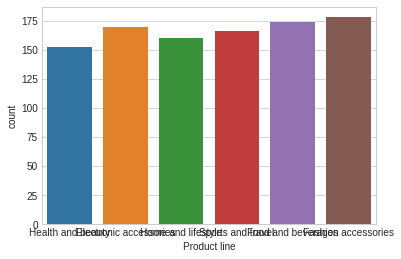

In [79]:
sns.countplot(x=df['Product line'])

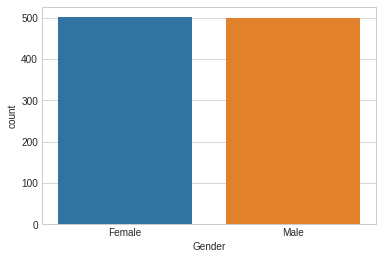

In [80]:
sns.countplot(x=df['Gender'])

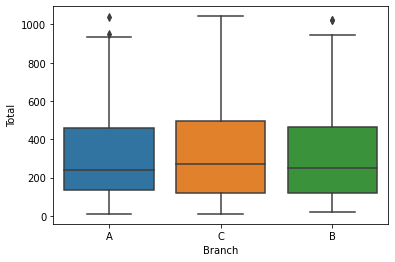

In [14]:
sns.boxplot(x='Branch',y='Total',data=df)

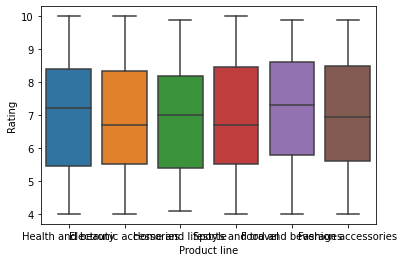

In [15]:
sns.boxplot(x='Product line',y='Rating',data=df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [93]:
def imp(cols):
    gen=cols.split(':')
    h=int(gen[0])
    m=int(gen[1])
    return (h*60+m)

In [94]:
df['ts'] = df['Time'].apply(imp)

In [95]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,rn,ts
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,5.112876,23.430141,1/5/2019,13:08,Ewallet,22.865476,4.761905,5.112876,9.1,17.0,788
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,1.954482,8.956562,3/8/2019,10:29,Cash,8.740709,4.761905,1.954482,9.6,18.0,629
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,4.026847,18.453333,3/3/2019,13:23,Credit card,18.008609,4.761905,4.026847,7.4,13.0,803
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,4.825764,22.114430,1/27/2019,20:33,Ewallet,21.581474,4.761905,4.825764,8.4,15.0,1233
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,5.496226,25.186872,2/8/2019,10:37,Ewallet,24.579870,4.761905,5.496226,5.3,9.0,637


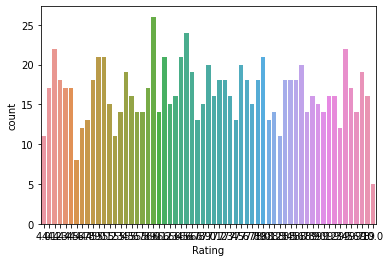

In [28]:
sns.countplot(x=df['Rating'])

In [40]:
df['Rating'].value_counts()

6.0     26
6.6     24
9.5     22
4.2     22
8.0     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64

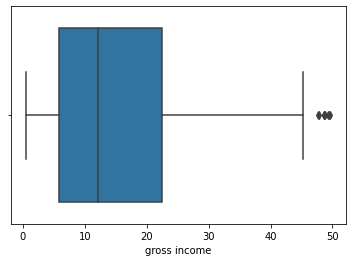

In [25]:
sns.boxplot(x=df['gross income'])

In [29]:
s='gross income'
q3=df[s].quantile(0.75)
q1=df[s].quantile(0.25)
iqr=q3-q1
nm=df.loc[~((df[s]<(q1-1.5*iqr)) | (df[s]>(q3+1.5*iqr))),s].mean()
df.loc[(df[s]<(q1-1.5*iqr)) | (df[s]>(q3+1.5*iqr)),s]=nm

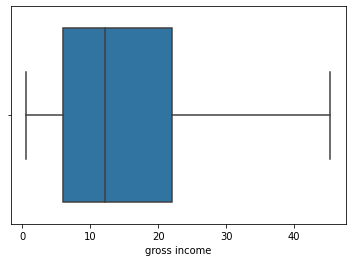

In [30]:
sns.boxplot(x=df['gross income'])

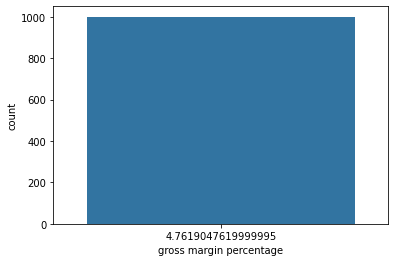

In [26]:
sns.countplot(x=df['gross margin percentage'])

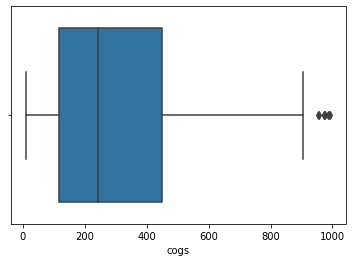

In [23]:
sns.boxplot(x=df['cogs'])

In [31]:
s='cogs'
q3=df[s].quantile(0.75)
q1=df[s].quantile(0.25)
iqr=q3-q1
nm=df.loc[~((df[s]<(q1-1.5*iqr)) | (df[s]>(q3+1.5*iqr))),s].mean()
df.loc[(df[s]<(q1-1.5*iqr)) | (df[s]>(q3+1.5*iqr)),s]=nm

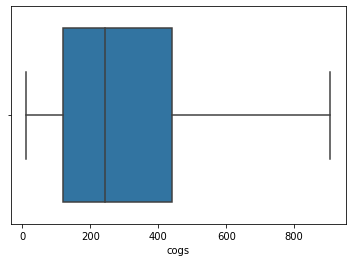

In [32]:
sns.boxplot(x=df['cogs'])

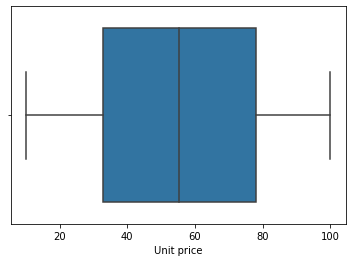

In [18]:
sns.boxplot(x=df['Unit price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


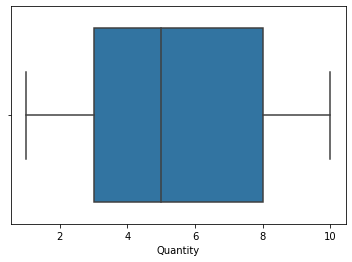

In [19]:
sns.boxplot(x=df['Quantity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


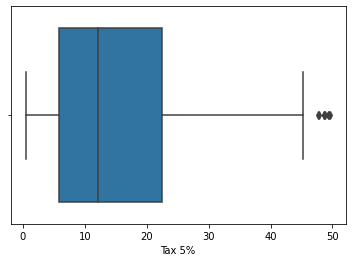

In [20]:
sns.boxplot(x=df['Tax 5%'])

In [33]:
s='Tax 5%'
q3=df[s].quantile(0.75)
q1=df[s].quantile(0.25)
iqr=q3-q1
nm=df.loc[~((df[s]<(q1-1.5*iqr)) | (df[s]>(q3+1.5*iqr))),s].mean()
df.loc[(df[s]<(q1-1.5*iqr)) | (df[s]>(q3+1.5*iqr)),s]=nm

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


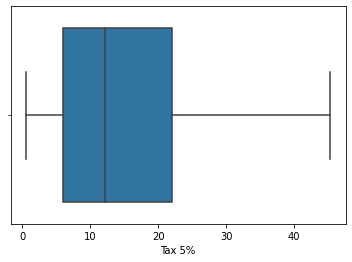

In [34]:
sns.boxplot(x=df['Tax 5%'])

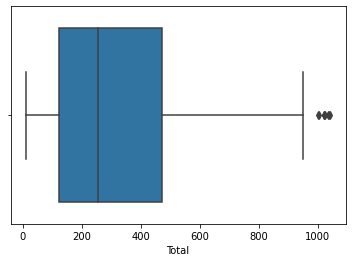

In [21]:
sns.boxplot(x=df['Total'])

In [37]:
s='Total'
q3=df[s].quantile(0.75)
q1=df[s].quantile(0.25)
iqr=q3-q1
nm=df.loc[~((df[s]<(q1-1.5*iqr)) | (df[s]>(q3+1.5*iqr))),s].mean()
df.loc[(df[s]<(q1-1.5*iqr)) | (df[s]>(q3+1.5*iqr)),s]=nm

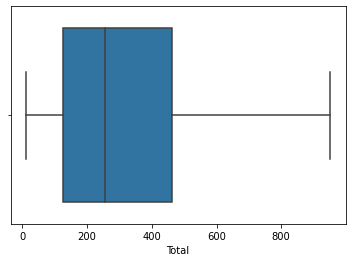

In [38]:
sns.boxplot(x=df['Total'])

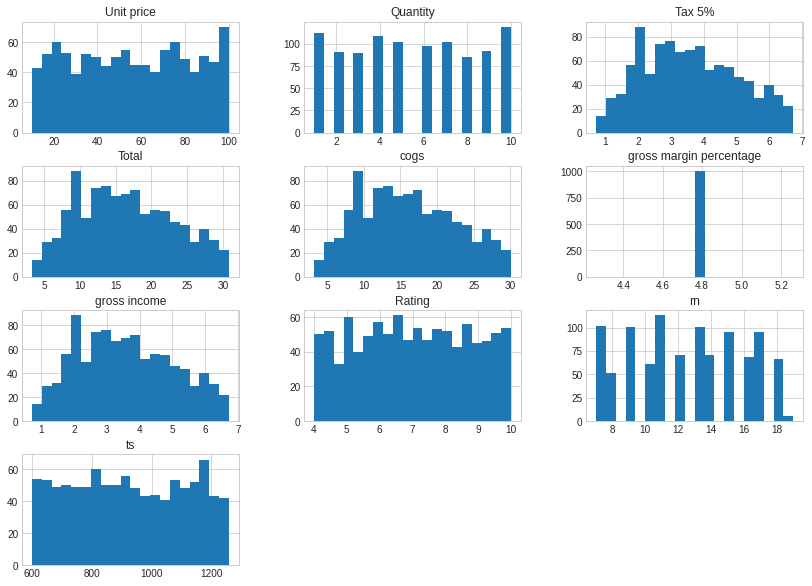

In [96]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20,figsize=(14,10))
plt.show()

In [ ]:
sns.pairplot(df)

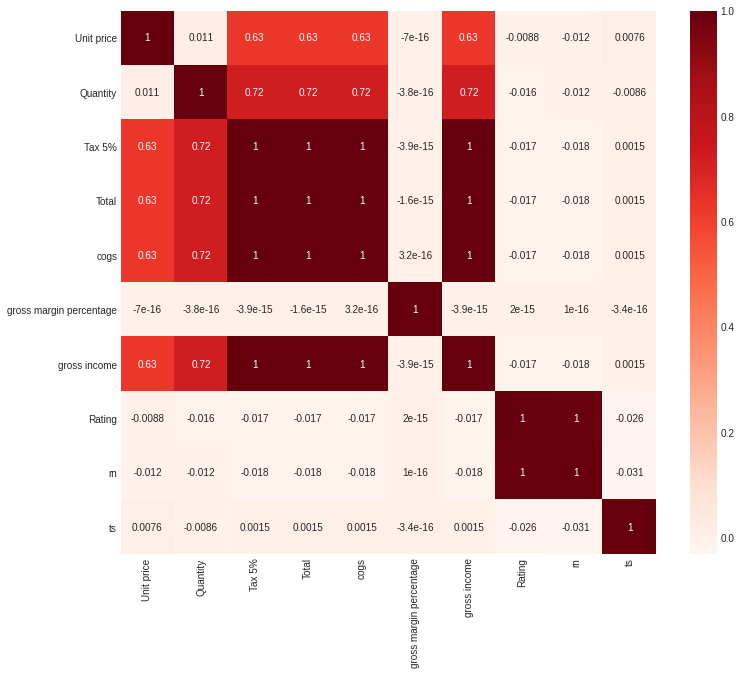

In [97]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

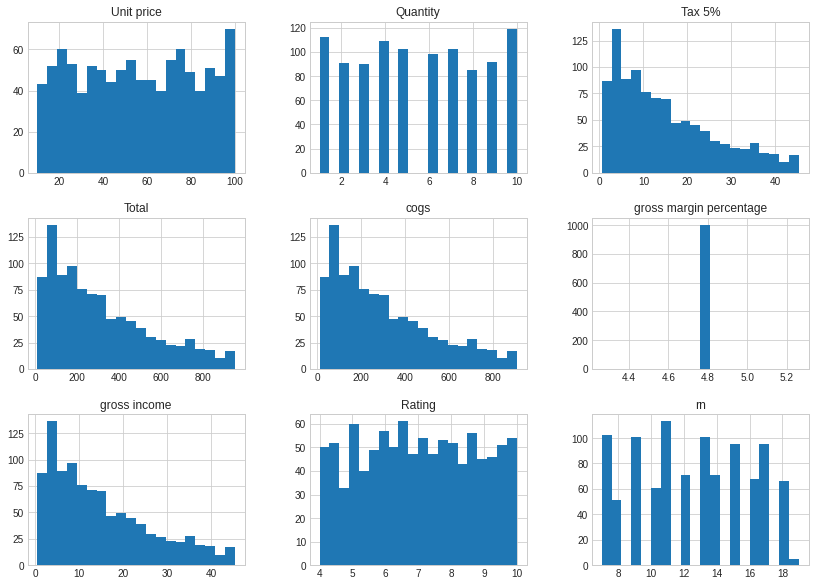

ValueError: ignored

AttributeError: ignored

In [ ]:
l

array([[1, 1, 2],
       [2, 3, 3]])